In [ ]:
"""
Company XYZ is a worldwide e-commerce site with localized versions of the site. A data scientist at XYZ noticed that Spain-based users have a much higher conversion rate than any other Spanish-speaking country. She therefore went and talked to the international team in charge of Spain And LatAm to see if they had any ideas about why that was happening.
Spain and LatAm country manager suggested that one reason could be translation. All Spanishspeaking countries had the same translation of the site which was written by a Spaniard. They agreed to try a test where each country would have its one translation written by a local. That is, Argentinian users would see a translation written by an Argentinian, Mexican users by a Mexican and so on. Obviously, nothing would change for users from Spain.
After they run the test however, they are really surprised cause the test is negative. I.e., it appears that the non-localized translation was doing better!

You are asked to:
1. Confirm that the test is actually negative. That is, it appears that the old version of 
the site with just one translation across Spain and LatAm performs better.

2. Explain why that might be happening. Are the localized translations really worse?
"""

In [36]:
import warnings
warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

# Load Both Dataset

In [4]:
test = pd.read_csv('/Users/adamichael/Dropbox/Job/Data/Translation_Test/test_table.csv',parse_dates=['date'])
test.head(10)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0


In [5]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 453321 entries, 0 to 453320
Data columns (total 9 columns):
user_id             453321 non-null int64
date                453321 non-null datetime64[ns]
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 31.1+ MB


In [6]:
test.describe()

,user_id,conversion,test
count,453321.000000,453321.000000,453321.000000
mean,499937.514728,0.049579,0.476446
std,288665.193436,0.217073,0.499445
min,1.000000,0.000000,0.000000
25%,249816.000000,0.000000,0.000000
50%,500019.000000,0.000000,0.000000
75%,749522.000000,0.000000,1.000000
max,1000000.000000,1.000000,1.000000


In [8]:
user = pd.read_csv('/Users/adamichael/Dropbox/Job/Data/Translation_Test/user_table.csv')
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [9]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452867 entries, 0 to 452866
Data columns (total 4 columns):
user_id    452867 non-null int64
sex        452867 non-null object
age        452867 non-null int64
country    452867 non-null object
dtypes: int64(2), object(2)
memory usage: 13.8+ MB


In [10]:
user.describe()

,user_id,age
count,452867.000000,452867.000000
mean,499944.805166,27.130740
std,288676.264784,6.776678
min,1.000000,18.000000
25%,249819.000000,22.000000
50%,500019.000000,26.000000
75%,749543.000000,31.000000
max,1000000.000000,70.000000


## check if there is any duplicate data

In [14]:
print(len(test['user_id'].unique())==len(test))
print(len(user['user_id'].unique())==len(user))

True
True


## Merge Two Dataset

In [15]:
data = pd.merge(left = test, right = user, how = 'left', on='user_id')
data.head(10)

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32.0,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34.0,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico
7,527287,2015-12-03,Direct,Web,EN,NaN,Chrome,0,0,M,22.0,Spain
8,261625,2015-12-04,Direct,Mobile,ES,NaN,Android_App,0,1,M,31.0,Bolivia
9,10427,2015-12-04,Ads,Mobile,ES,Facebook,Android_App,0,0,F,33.0,Mexico


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 453321 entries, 0 to 453320
Data columns (total 12 columns):
user_id             453321 non-null int64
date                453321 non-null datetime64[ns]
source              453321 non-null object
device              453321 non-null object
browser_language    453321 non-null object
ads_channel         181877 non-null object
browser             453321 non-null object
conversion          453321 non-null int64
test                453321 non-null int64
sex                 452867 non-null object
age                 452867 non-null float64
country             452867 non-null object
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 45.0+ MB


In [17]:
data.describe()

,user_id,conversion,test,age
count,453321.000000,453321.000000,453321.000000,452867.000000
mean,499937.514728,0.049579,0.476446,27.130740
std,288665.193436,0.217073,0.499445,6.776678
min,1.000000,0.000000,0.000000,18.000000
25%,249816.000000,0.000000,0.000000,22.000000
50%,500019.000000,0.000000,0.000000,26.000000
75%,749522.000000,0.000000,1.000000,31.000000
max,1000000.000000,1.000000,1.000000,70.000000


# Exploratory Data Analysis

## Mean Conversion of Placebo group

In [39]:
groupby_country = data[data['test']==0][['country','conversion']].groupby('country').mean().reset_index()
groupby_country = groupby_country.sort_values(by='conversion',ascending=False)
groupby_country

,country,conversion
14,Spain,0.079719
6,El Salvador,0.053554
10,Nicaragua,0.052647
4,Costa Rica,0.052256
3,Colombia,0.052089
8,Honduras,0.050906
7,Guatemala,0.050643
16,Venezuela,0.050344
13,Peru,0.049914
9,Mexico,0.049495


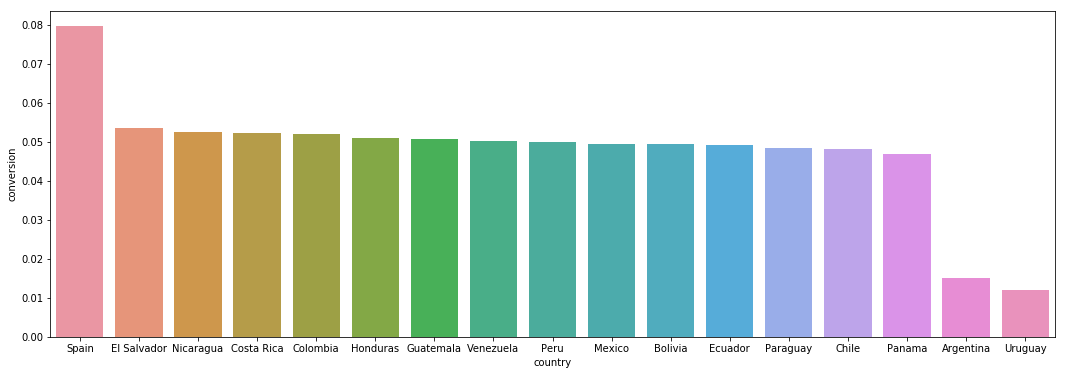

In [28]:
fig, ax = plt.subplots(figsize = (18,6))
sns.barplot(x='country',y='conversion',data=groupby_country)
plt.show()

## mean conversion between placebo and test per country (exclude Spain)

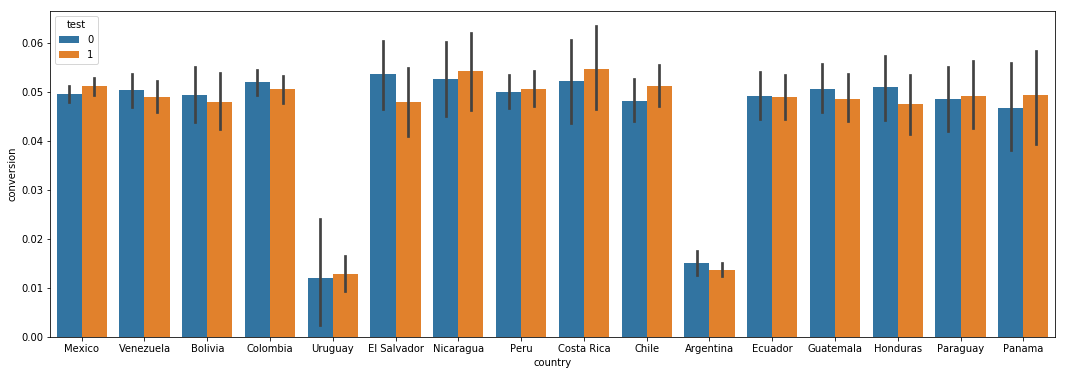

In [64]:
data_nospain = data[data['country']!='Spain']
fig, ax = plt.subplots(figsize = (18,6))
sns.barplot(x='country',y='conversion',hue='test',data=data_nospain)
plt.show()

# A/B Test

In [65]:
test_val = np.array(data_nospain[data_nospain['test']==1]['conversion'])
cont_val = np.array(data_nospain[data_nospain['test']==0]['conversion'])
print(test_val.mean(), cont_val.mean())

0.043424713982118966 0.04833042316066309


In [67]:
print(ttest_ind(test_val, cont_val, equal_var=False))

Ttest_indResult(statistic=-7.3939374121344805, pvalue=1.4282994754055316e-13)


# Analysis

## Conversion Per Date

In [69]:
data_nospain['date']=pd.to_datetime(data_nospain['date'].dt.strftime('%m/%d/%Y'))
data_nospain.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21.0,Mexico
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22.0,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19.0,Mexico
5,540675,2015-12-03,Direct,Mobile,ES,NaN,Android_App,0,1,F,22.0,Venezuela
6,863394,2015-12-04,SEO,Mobile,Other,NaN,Android_App,0,0,M,35.0,Mexico


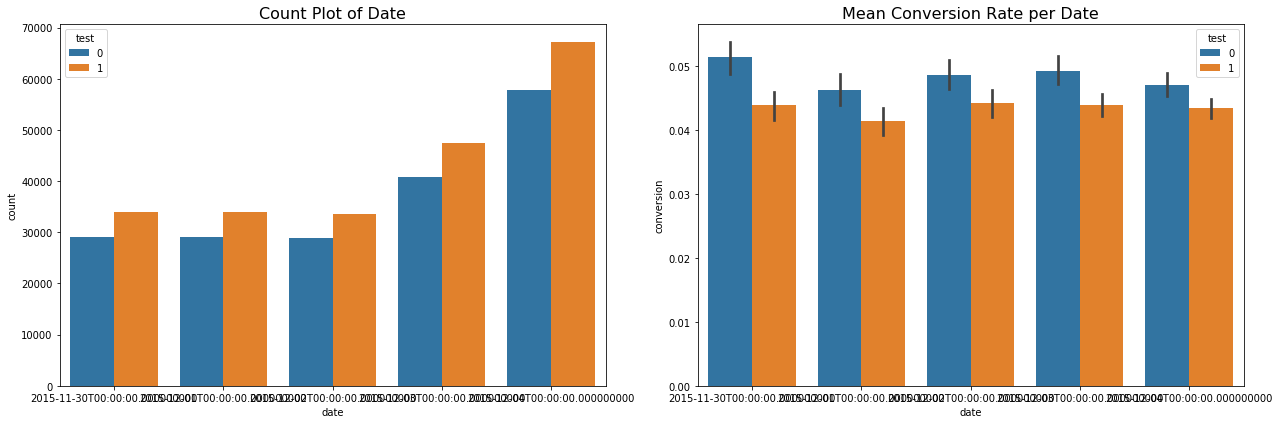

In [70]:
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(18,6))
sns.countplot(x='date',hue='test',ax=ax[0],data=data_nospain)
ax[0].set_title('Count Plot of Date', fontsize=16)
sns.barplot(x='date', y='conversion', hue='test', data=data_nospain, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Date', fontsize=16)
plt.tight_layout()
plt.show()

In [71]:
## the test distribution across the dates are comparable, and the effect is constant across the dates.

## Conversion Per Source

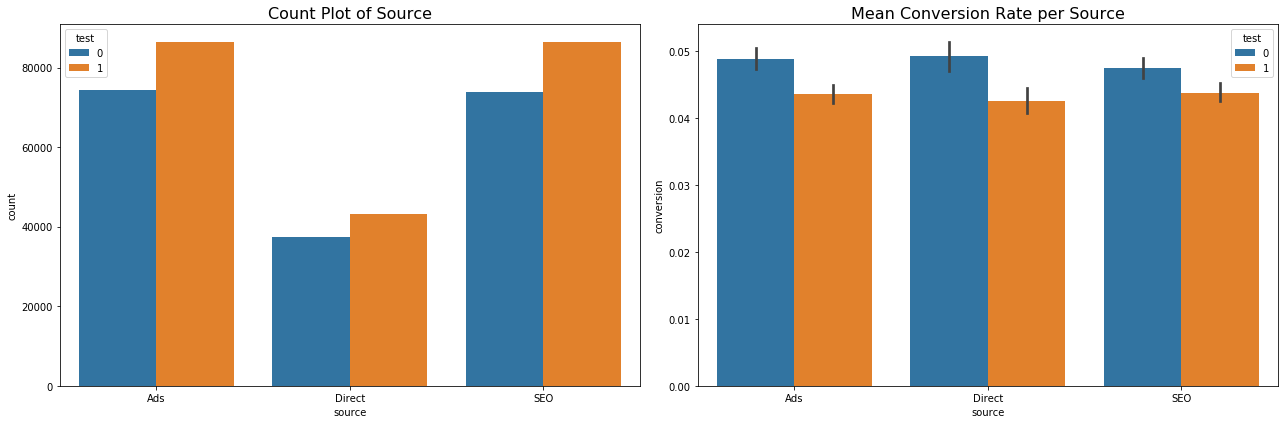

In [74]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='source', hue='test', data=data_nospain, ax=ax[0])
ax[0].set_title('Count Plot of Source', fontsize=16)

sns.barplot(x='source', y='conversion', hue='test', data=data_nospain, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Source', fontsize=16)
plt.tight_layout()
plt.show()

In [73]:
## Roughly equal distribution of test samples across different sources. The effects are constant across different sources.

## Conversion Per Device

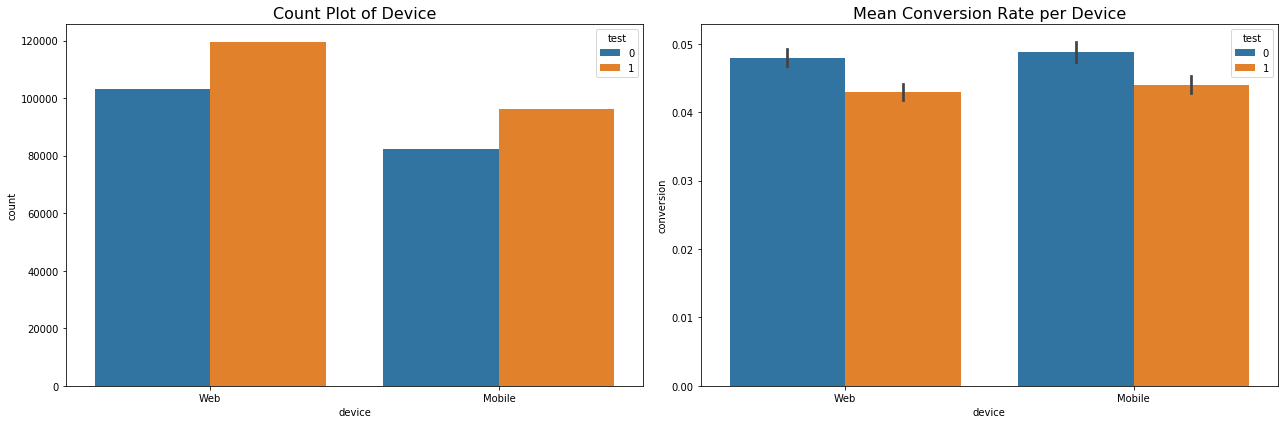

In [75]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='device', hue='test', data=data_nospain, ax=ax[0])
ax[0].set_title('Count Plot of Device', fontsize=16)

sns.barplot(x='device', y='conversion', hue='test', data=data_nospain, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Device', fontsize=16)
plt.tight_layout()
plt.show()

## Conversion Per Browser Language

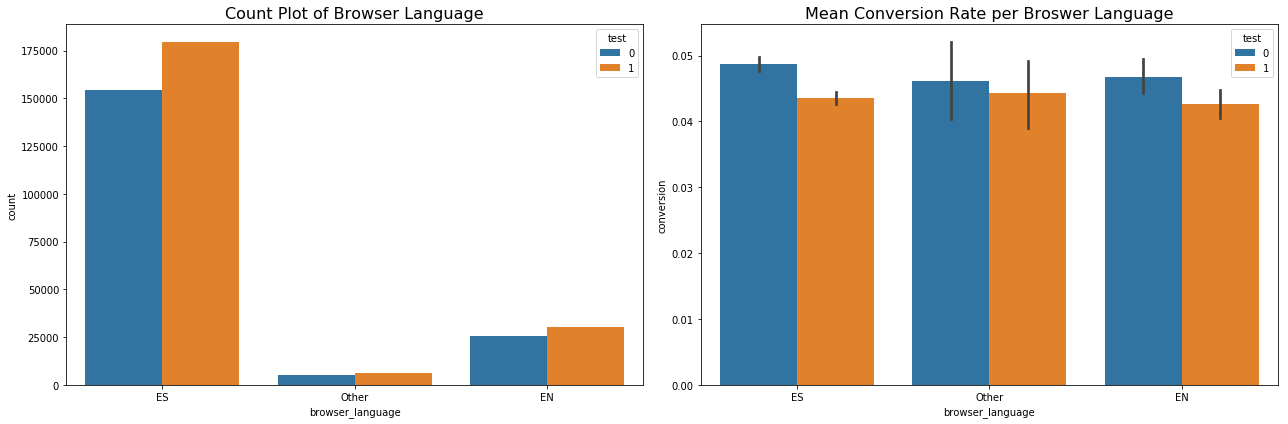

In [76]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='browser_language', hue='test', data=data_nospain, ax=ax[0])
ax[0].set_title('Count Plot of Browser Language', fontsize=16)

sns.barplot(x='browser_language', y='conversion', hue='test', data=data_nospain, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Broswer Language', fontsize=16)
plt.tight_layout()
plt.show()

## Conversion Per Channel

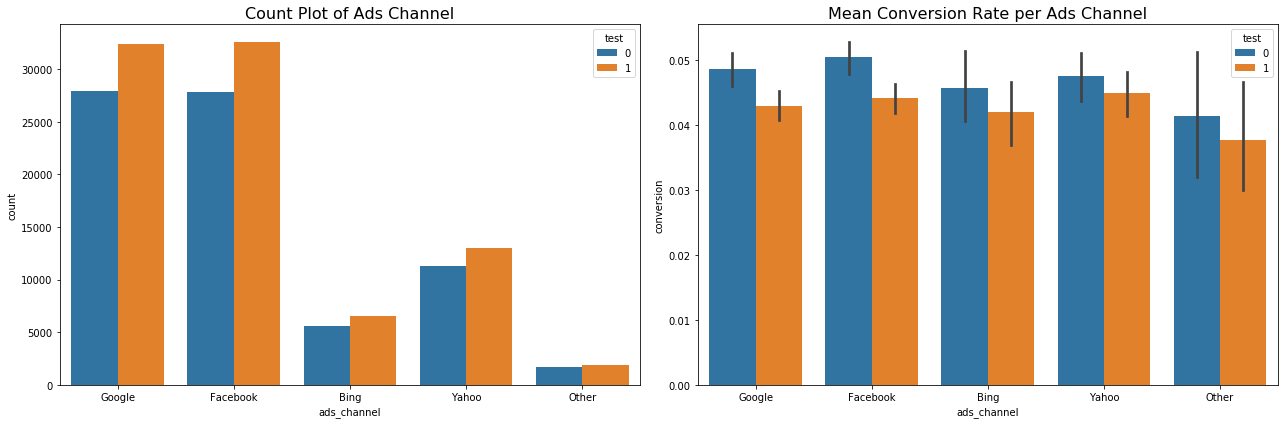

In [77]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='ads_channel', hue='test', data=data_nospain, ax=ax[0])
ax[0].set_title('Count Plot of Ads Channel', fontsize=16)

sns.barplot(x='ads_channel', y='conversion', hue='test', data=data_nospain, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Ads Channel', fontsize=16)
plt.tight_layout()
plt.show()

## Conversion Per Browser

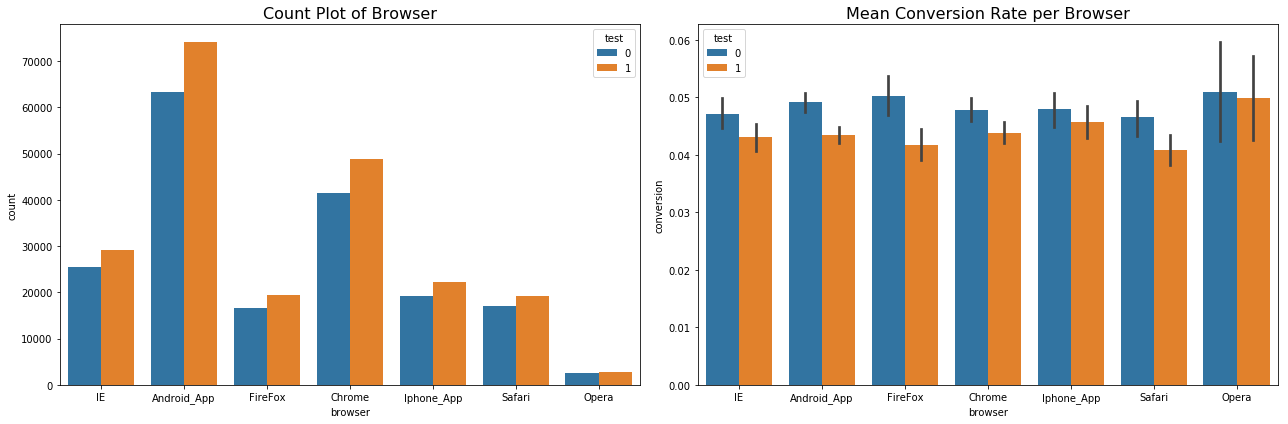

In [78]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='browser', hue='test', data=data_nospain, ax=ax[0])
ax[0].set_title('Count Plot of Browser', fontsize=16)

sns.barplot(x='browser', y='conversion', hue='test', data=data_nospain, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Browser', fontsize=16)
plt.tight_layout()
plt.show()

## Conversion Per Gender

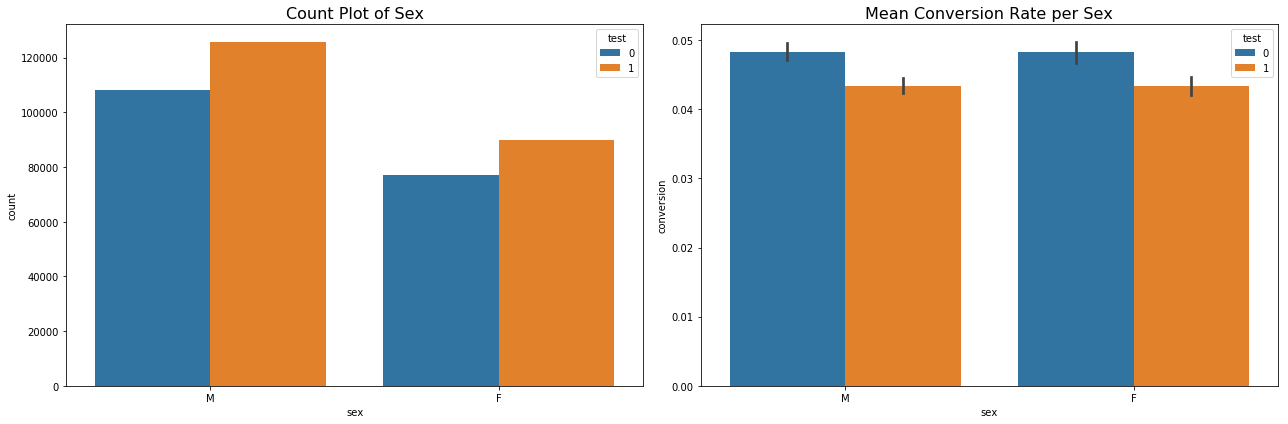

In [79]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))
sns.countplot(x='sex', hue='test', data=data_nospain, ax=ax[0])
ax[0].set_title('Count Plot of Sex', fontsize=16)

sns.barplot(x='sex', y='conversion', hue='test', data=data_nospain, ax=ax[1])
ax[1].set_title('Mean Conversion Rate per Sex', fontsize=16)
plt.tight_layout()
plt.show()

# T-Test on Different Subgroups to see if the significance lasts

## T-Test on Each Country

In [85]:
data = data_nospain
countries = [name for name in data['country'].unique() if name is not np.nan]
print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Country', 'Test Rate', 'Control Rate', 'P-Value'))
print('-' * 65)
for country in countries:
    test_val = data[(data['country'] == country) & (data['test'] == 1)]['conversion'].values
    cont_val = data[(data['country'] == country) & (data['test'] == 0)]['conversion'].values
    
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = ttest_ind(test_val, cont_val, equal_var=False).pvalue
    
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(country, test_mean, cont_mean, p_val))

Country               Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
Mexico                  0.05119         0.04949   0.165544
Venezuela               0.04898         0.05034   0.573702
Bolivia                 0.04790         0.04937   0.718885
Colombia                0.05057         0.05209   0.423719
Uruguay                 0.01291         0.01205   0.879764
El Salvador             0.04795         0.05355   0.248127
Nicaragua               0.05418         0.05265   0.780400
Peru                    0.05060         0.04991   0.771953
Costa Rica              0.05474         0.05226   0.687876
Chile                   0.05130         0.04811   0.302848
Argentina               0.01373         0.01507   0.335147
Ecuador                 0.04899         0.04915   0.961512
Guatemala               0.04865         0.05064   0.572107
Honduras                0.04754         0.05091   0.471463
Paraguay                0.04923         0.04849  

In [81]:
## Not a single country has the significance! The generic significant effect won't last in sub-country level

## T-Test on Sex

In [86]:
genders = [g for g in data['sex'].unique() if g is not np.nan]
print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('Gender', 'Test Rate', 'Control Rate', 'P-Value'))
print('-' * 65)
for gender in genders:
    test_val = data[(data['sex'] == gender) & (data['test'] == 1)]['conversion'].values
    cont_val = data[(data['sex'] == gender) & (data['test'] == 0)]['conversion'].values
    
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = ttest_ind(test_val, cont_val, equal_var=False).pvalue
    
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(gender, test_mean, cont_mean, p_val))

Gender                Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
M                       0.04344         0.04828   0.000000
F                       0.04338         0.04830   0.000002


## T-Test on Source

In [87]:
sources = [s for s in data['source'].unique() if s is not np.nan]
print('{0:15s} {1:>15s} {2:>15s} {3:>10s}'.format('source', 'Test Rate', 'Control Rate', 'P-Value'))
print('-' * 65)
for source in sources:
    test_val = data[(data['source'] == source) & (data['test'] == 1)]['conversion'].values
    cont_val = data[(data['source'] == source) & (data['test'] == 0)]['conversion'].values
    
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = ttest_ind(test_val, cont_val, equal_var=False).pvalue
    
    print('{0:15s} {1:15.5f} {2:15.5f} {3:10f}'.format(source, test_mean, cont_mean, p_val))

source                Test Rate    Control Rate    P-Value
-----------------------------------------------------------------
Ads                     0.04355         0.04875   0.000001
Direct                  0.04249         0.04927   0.000005
SEO                     0.04377         0.04743   0.000475


In [1]:
"""
Summary:
1. Although in general there is significant statistical difference, in country level, the effect is gone. 
2. The effect is siginificant across other categories such as gender, device, browser.
3. To detect the difference in country level, we might need to increase sample size to gain more statistical power.
"""

'\nSummary:\n1. Although in general there is significant statistical difference, in country level, the effect is gone. \n2. The effect is siginificant across other categories such as gender, device, browser.\n3. To detect the difference in country level, we might need to increase sample size to gain more statistical power.\n'